In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [3]:
# get path
path = os.getcwd()
path = os.path.abspath(os.path.join(path, os.pardir))
path = os.path.abspath(os.path.join(path, os.pardir))
path = os.path.join(path, 'data/raw/GYAFC_Corpus')
print(path)

# Load the data for test, train and tune for entertainment_music category
formal_test_music = pd.DataFrame(pd.read_table(path + '/Entertainment_Music/test/formal'))
informal_test_music = pd.DataFrame(pd.read_table(path + '/Entertainment_Music/test/informal'))
formal_train_music = pd.DataFrame(pd.read_table(path + '/Entertainment_Music/train/formal'))
informal_train_music = pd.DataFrame(pd.read_table(path + '/Entertainment_Music/train/informal'))
formal_tune_music = pd.DataFrame(pd.read_table(path + '/Entertainment_Music/tune/formal'))
informal_tune_music = pd.DataFrame(pd.read_table(path + '/Entertainment_Music/tune/informal'))

# Load the data for test, train and tune for family_relationships category
formal_test_family = pd.DataFrame(pd.read_table(path + '/Family_Relationships/test/formal'))
informal_test_family = pd.DataFrame(pd.read_table(path + '/Family_Relationships/test/informal'))
formal_train_family = pd.DataFrame(pd.read_table(path + '/Family_Relationships/train/formal'))
informal_train_family = pd.DataFrame(pd.read_table(path + '/Family_Relationships/train/informal'))
formal_tune_family = pd.DataFrame(pd.read_table(path + '/Family_Relationships/tune/formal'))
informal_tune_family = pd.DataFrame(pd.read_table(path + '/Family_Relationships/tune/informal'))

# Make a list of all the dataframes
all_music = [formal_test_music, informal_test_music, formal_train_music, informal_train_music, formal_tune_music, informal_tune_music]
all_family = [formal_test_family, informal_test_family, formal_train_family, informal_train_family, formal_tune_family, informal_tune_family]

/Users/lauramariaquirosconesa/Documents/BSc/Year4/Large Language Models/LLM-Group-04/data/raw/GYAFC_Corpus


In [10]:
formal_ref_0 = pd.DataFrame(pd.read_table(path + '/Entertainment_Music/test/formal.ref0'))
formal_ref_1 = pd.DataFrame(pd.read_table(path + '/Entertainment_Music/test/formal.ref1'))
formal_ref_2 = pd.DataFrame(pd.read_table(path + '/Entertainment_Music/test/formal.ref2'))
formal_ref_3 = pd.DataFrame(pd.read_table(path + '/Entertainment_Music/test/formal.ref3'))
informal_ref_0 = pd.DataFrame(pd.read_table(path + '/Entertainment_Music/test/informal.ref0'))
informal_ref_1 = pd.DataFrame(pd.read_table(path + '/Entertainment_Music/test/informal.ref1'))
informal_ref_2 = pd.DataFrame(pd.read_table(path + '/Entertainment_Music/test/informal.ref2'))
informal_ref_3 = pd.DataFrame(pd.read_table(path + '/Entertainment_Music/test/informal.ref3'))

print(f"Total number of lines in all references and test data for Entertainment_Music: {[len(dataset) for dataset in [formal_ref_0, formal_ref_1, formal_ref_2, formal_ref_3, formal_test_music]]}")
print(f"Total number of lines in all references and test data for Entertainment_Music: {[len(dataset) for dataset in [informal_ref_0, informal_ref_1, informal_ref_2, informal_ref_3, informal_test_music]]}")

formal_ref_0 = pd.DataFrame(pd.read_table(path + '/Family_Relationships/test/formal.ref0'))
formal_ref_1 = pd.DataFrame(pd.read_table(path + '/Family_Relationships/test/formal.ref1'))
formal_ref_2 = pd.DataFrame(pd.read_table(path + '/Family_Relationships/test/formal.ref2'))
formal_ref_3 = pd.DataFrame(pd.read_table(path + '/Family_Relationships/test/formal.ref3'))
informal_ref_0 = pd.DataFrame(pd.read_table(path + '/Family_Relationships/test/informal.ref0'))
informal_ref_1 = pd.DataFrame(pd.read_table(path + '/Family_Relationships/test/informal.ref1'))
informal_ref_2 = pd.DataFrame(pd.read_table(path + '/Family_Relationships/test/informal.ref2'))
informal_ref_3 = pd.DataFrame(pd.read_table(path + '/Family_Relationships/test/informal.ref3'))

print(f"Total number of lines in all references and test data for Family_Relationships: {[len(dataset) for dataset in [formal_ref_0, formal_ref_1, formal_ref_2, formal_ref_3, formal_test_family]]}")
print(f"Total number of lines in all references and test data for Family_Relationships: {[len(dataset) for dataset in [informal_ref_0, informal_ref_1, informal_ref_2, informal_ref_3, informal_test_family]]}")

Total number of lines in all references and test data for Entertainment_Music: [1415, 1415, 1415, 1415, 1081]
Total number of lines in all references and test data for Entertainment_Music: [1081, 1081, 1081, 1081, 1415]
Total number of lines in all references and test data for Family_Relationships: [1331, 1331, 1331, 1331, 1018]
Total number of lines in all references and test data for Family_Relationships: [1018, 1018, 1018, 1018, 1331]


In [4]:
# look for missing values through all_music and all_family
def check_missing_values(datasets, category: str):
    for dataset in datasets:
        print(f"Missing values in {category} dataset: {dataset.isnull().sum().sum()}")

check_missing_values(all_music, 'Music')
check_missing_values(all_family, 'Family')

Missing values in Music dataset: 0
Missing values in Music dataset: 0
Missing values in Music dataset: 0
Missing values in Music dataset: 0
Missing values in Music dataset: 0
Missing values in Music dataset: 0
Missing values in Family dataset: 0
Missing values in Family dataset: 0
Missing values in Family dataset: 0
Missing values in Family dataset: 0
Missing values in Family dataset: 0
Missing values in Family dataset: 0


In [5]:
def get_all_lengths(dataset):
    lengths = []
    for i in range(len(dataset)):
        lengths.append(len(dataset.iloc[i].values[0].split()))
    return lengths

datasets_test = [formal_test_music, informal_test_music]
datasets_test_lengths = [[lenghts for lenghts in get_all_lengths(dataset)] for dataset in datasets_test]
print(datasets_test_lengths)

[[6, 4, 12, 7, 8, 16, 11, 7, 23, 5, 9, 10, 17, 11, 20, 20, 10, 6, 14, 12, 16, 9, 14, 11, 15, 7, 12, 8, 8, 9, 12, 9, 11, 4, 16, 13, 5, 17, 6, 15, 10, 17, 16, 15, 10, 20, 5, 10, 15, 11, 13, 5, 9, 8, 12, 10, 6, 7, 6, 7, 10, 9, 13, 8, 18, 8, 10, 9, 16, 16, 8, 9, 10, 33, 19, 18, 8, 8, 17, 12, 10, 6, 8, 15, 10, 12, 11, 16, 10, 11, 8, 7, 7, 10, 9, 13, 8, 8, 9, 12, 14, 10, 11, 18, 12, 7, 12, 22, 17, 9, 12, 12, 11, 19, 20, 6, 12, 11, 18, 9, 7, 7, 9, 10, 12, 12, 12, 11, 10, 13, 7, 8, 17, 8, 4, 13, 7, 10, 9, 4, 9, 11, 14, 14, 12, 11, 4, 12, 13, 10, 14, 5, 21, 10, 17, 5, 15, 14, 16, 10, 7, 10, 5, 13, 6, 8, 13, 6, 6, 8, 15, 11, 13, 8, 8, 7, 22, 7, 11, 16, 8, 9, 6, 10, 8, 10, 19, 10, 15, 12, 18, 17, 8, 18, 7, 11, 7, 8, 12, 12, 9, 13, 10, 19, 7, 7, 14, 8, 9, 5, 13, 11, 11, 5, 8, 15, 9, 6, 7, 5, 16, 12, 14, 15, 8, 10, 6, 10, 10, 8, 19, 9, 21, 10, 9, 7, 6, 10, 8, 14, 10, 8, 9, 7, 9, 9, 10, 8, 10, 14, 11, 7, 8, 15, 7, 8, 8, 6, 12, 8, 9, 9, 9, 10, 8, 6, 16, 19, 13, 10, 8, 15, 15, 8, 8, 5, 16, 10, 13, 7, 

/var/folders/jx/nw81mq5d1cl9wrj1h46m_m9h0000gn/T/ipykernel_5649/610879802.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


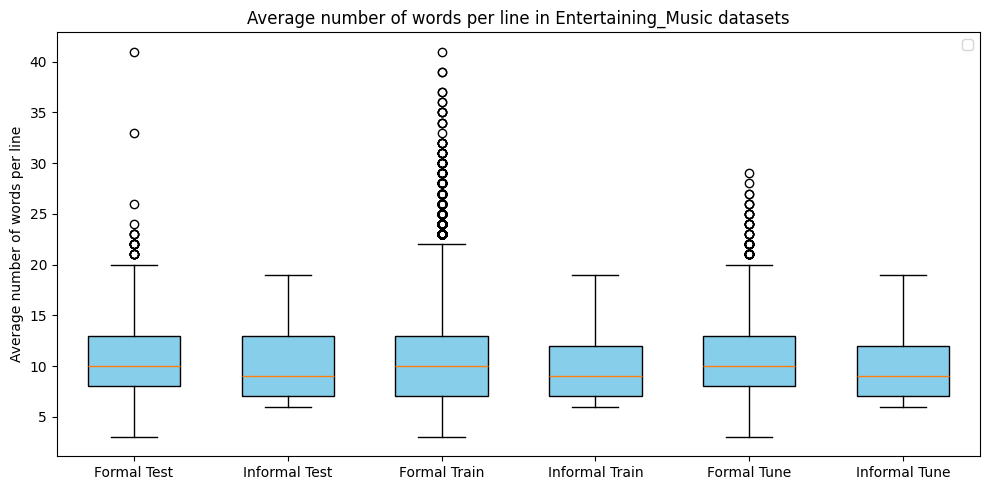

/var/folders/jx/nw81mq5d1cl9wrj1h46m_m9h0000gn/T/ipykernel_5649/610879802.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


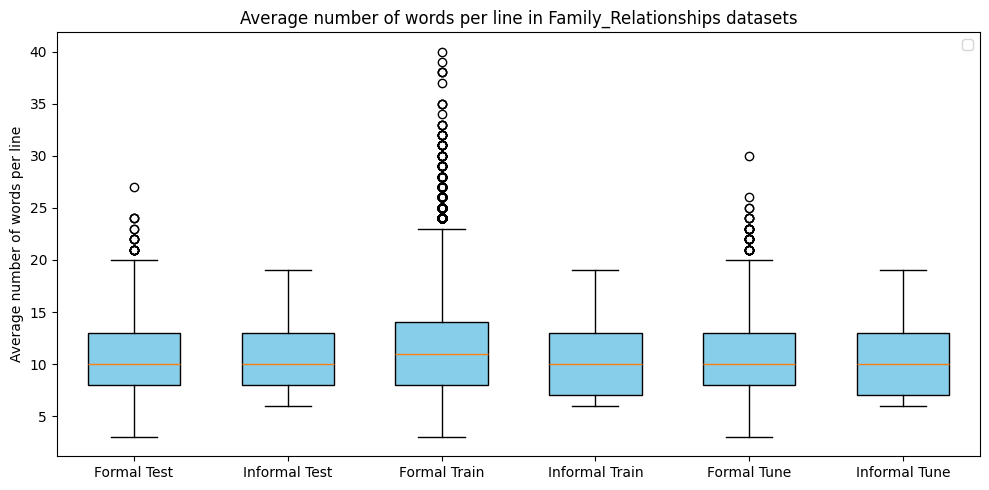

In [6]:
def make_boxplot(all_datasets, category: str):
    # there is no column for the number of words in the line, so we need to count length of each dataframe row
    all_lengths = [[lenghts for lenghts in get_all_lengths(dataset)] for dataset in all_datasets]

    labels = ['Formal Test', 'Informal Test', 'Formal Train', 'Informal Train', 'Formal Tune', 'Informal Tune']
    # Define positions for the bars
    x = np.arange(len(labels))  # The label locations
    width = 0.35  # Width of the bars

    # Create a figure and axes
    fig, ax = plt.subplots(figsize=(10, 5))

    # create boxplot, BOXPLOT so that we have a better understanding of the distribution of the data

    for i, dataset in enumerate(all_lengths):
        ax.boxplot(dataset, positions=[i], widths=0.6, patch_artist=True, boxprops=dict(facecolor='skyblue'))

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Average number of words per line')
    ax.set_title(f'Average number of words per line in {category} datasets')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

    # Save the plot
    fig.savefig(f'../../images/average_words_{category}.png')

make_boxplot(all_music, 'Entertaining_Music')
make_boxplot(all_family, 'Family_Relationships')

In [7]:
# how many of the lines in the datasets are over 30 words, using function get_all_lengths
labels = ['Formal Test', 'Informal Test', 'Formal Train', 'Informal Train', 'Formal Tune', 'Informal Tune']

for i, dataset in enumerate(all_music):
    # include percentage of lines that are over 30 words 
    over_30 = [lenghts for lenghts in get_all_lengths(dataset) if lenghts > 30]
    percentage = len(over_30) / len(dataset) * 100
    print(f"Percentage over 30 words in Entertainment_Music {labels[i]}: {percentage:.2f}%, {len(over_30)} lines")

for i, dataset in enumerate(all_family):
    # include percentage of lines that are over 30 words 
    over_30 = [lenghts for lenghts in get_all_lengths(dataset) if lenghts > 30]
    percentage = len(over_30) / len(dataset) * 100
    print(f"Percentage of lines over 30 words in Family_Relationship {labels[i]}: {percentage:.2f}%, {len(over_30)} lines")


Percentage over 30 words in Entertainment_Music Formal Test: 0.19%, 2 lines
Percentage over 30 words in Entertainment_Music Informal Test: 0.00%, 0 lines
Percentage over 30 words in Entertainment_Music Formal Train: 0.06%, 29 lines
Percentage over 30 words in Entertainment_Music Informal Train: 0.00%, 0 lines
Percentage over 30 words in Entertainment_Music Formal Tune: 0.00%, 0 lines
Percentage over 30 words in Entertainment_Music Informal Tune: 0.00%, 0 lines
Percentage of lines over 30 words in Family_Relationship Formal Test: 0.00%, 0 lines
Percentage of lines over 30 words in Family_Relationship Informal Test: 0.00%, 0 lines
Percentage of lines over 30 words in Family_Relationship Formal Train: 0.07%, 34 lines
Percentage of lines over 30 words in Family_Relationship Informal Train: 0.00%, 0 lines
Percentage of lines over 30 words in Family_Relationship Formal Tune: 0.00%, 0 lines
Percentage of lines over 30 words in Family_Relationship Informal Tune: 0.00%, 0 lines


In [25]:
# how much of the data is test, train and tune
# join informal and formal datasets
def percentages_of_split(all_dataset, category: str):
    all_lengths = [[lenghts for lenghts in get_all_lengths(dataset)] for dataset in all_dataset]
    total = [sum(lengths) for lengths in all_lengths]
    test_length = all_lengths[0] + all_lengths[1]
    train_length = all_lengths[2] + all_lengths[3]
    tune_length = all_lengths[4] + all_lengths[5]
    
    print(f"Percentage of test data in {category}: {sum(test_length) / sum(total) * 100:.2f}%")
    print(f"Percentage of train data in {category}: {sum(train_length) / sum(total) * 100:.2f}%")
    print(f"Percentage of tune data in {category}: {sum(tune_length) / sum(total) * 100:.2f}%")
    
percentages_of_split(all_music, 'Entertaining_Music')
percentages_of_split(all_family, 'Family_Relationships')

Percentage of test data in Entertaining_Music: 2.23%
Percentage of train data in Entertaining_Music: 93.11%
Percentage of tune data in Entertaining_Music: 4.66%
Percentage of test data in Family_Relationships: 2.08%
Percentage of train data in Family_Relationships: 93.60%
Percentage of tune data in Family_Relationships: 4.31%
